# Préparation des données

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import xgboost
import math

from time import time
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import tree, linear_model
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.metrics import explained_variance_score, r2_score

In [2]:
file = "/home/malick/Bureau/Stage_Projet_RTS/confluence-JDD/house/data/house_data.csv"
df = pd.read_csv(file)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
None


In [4]:
# On enléve la date de vente et l'id
df = df.drop(["id", "date"], axis=1)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


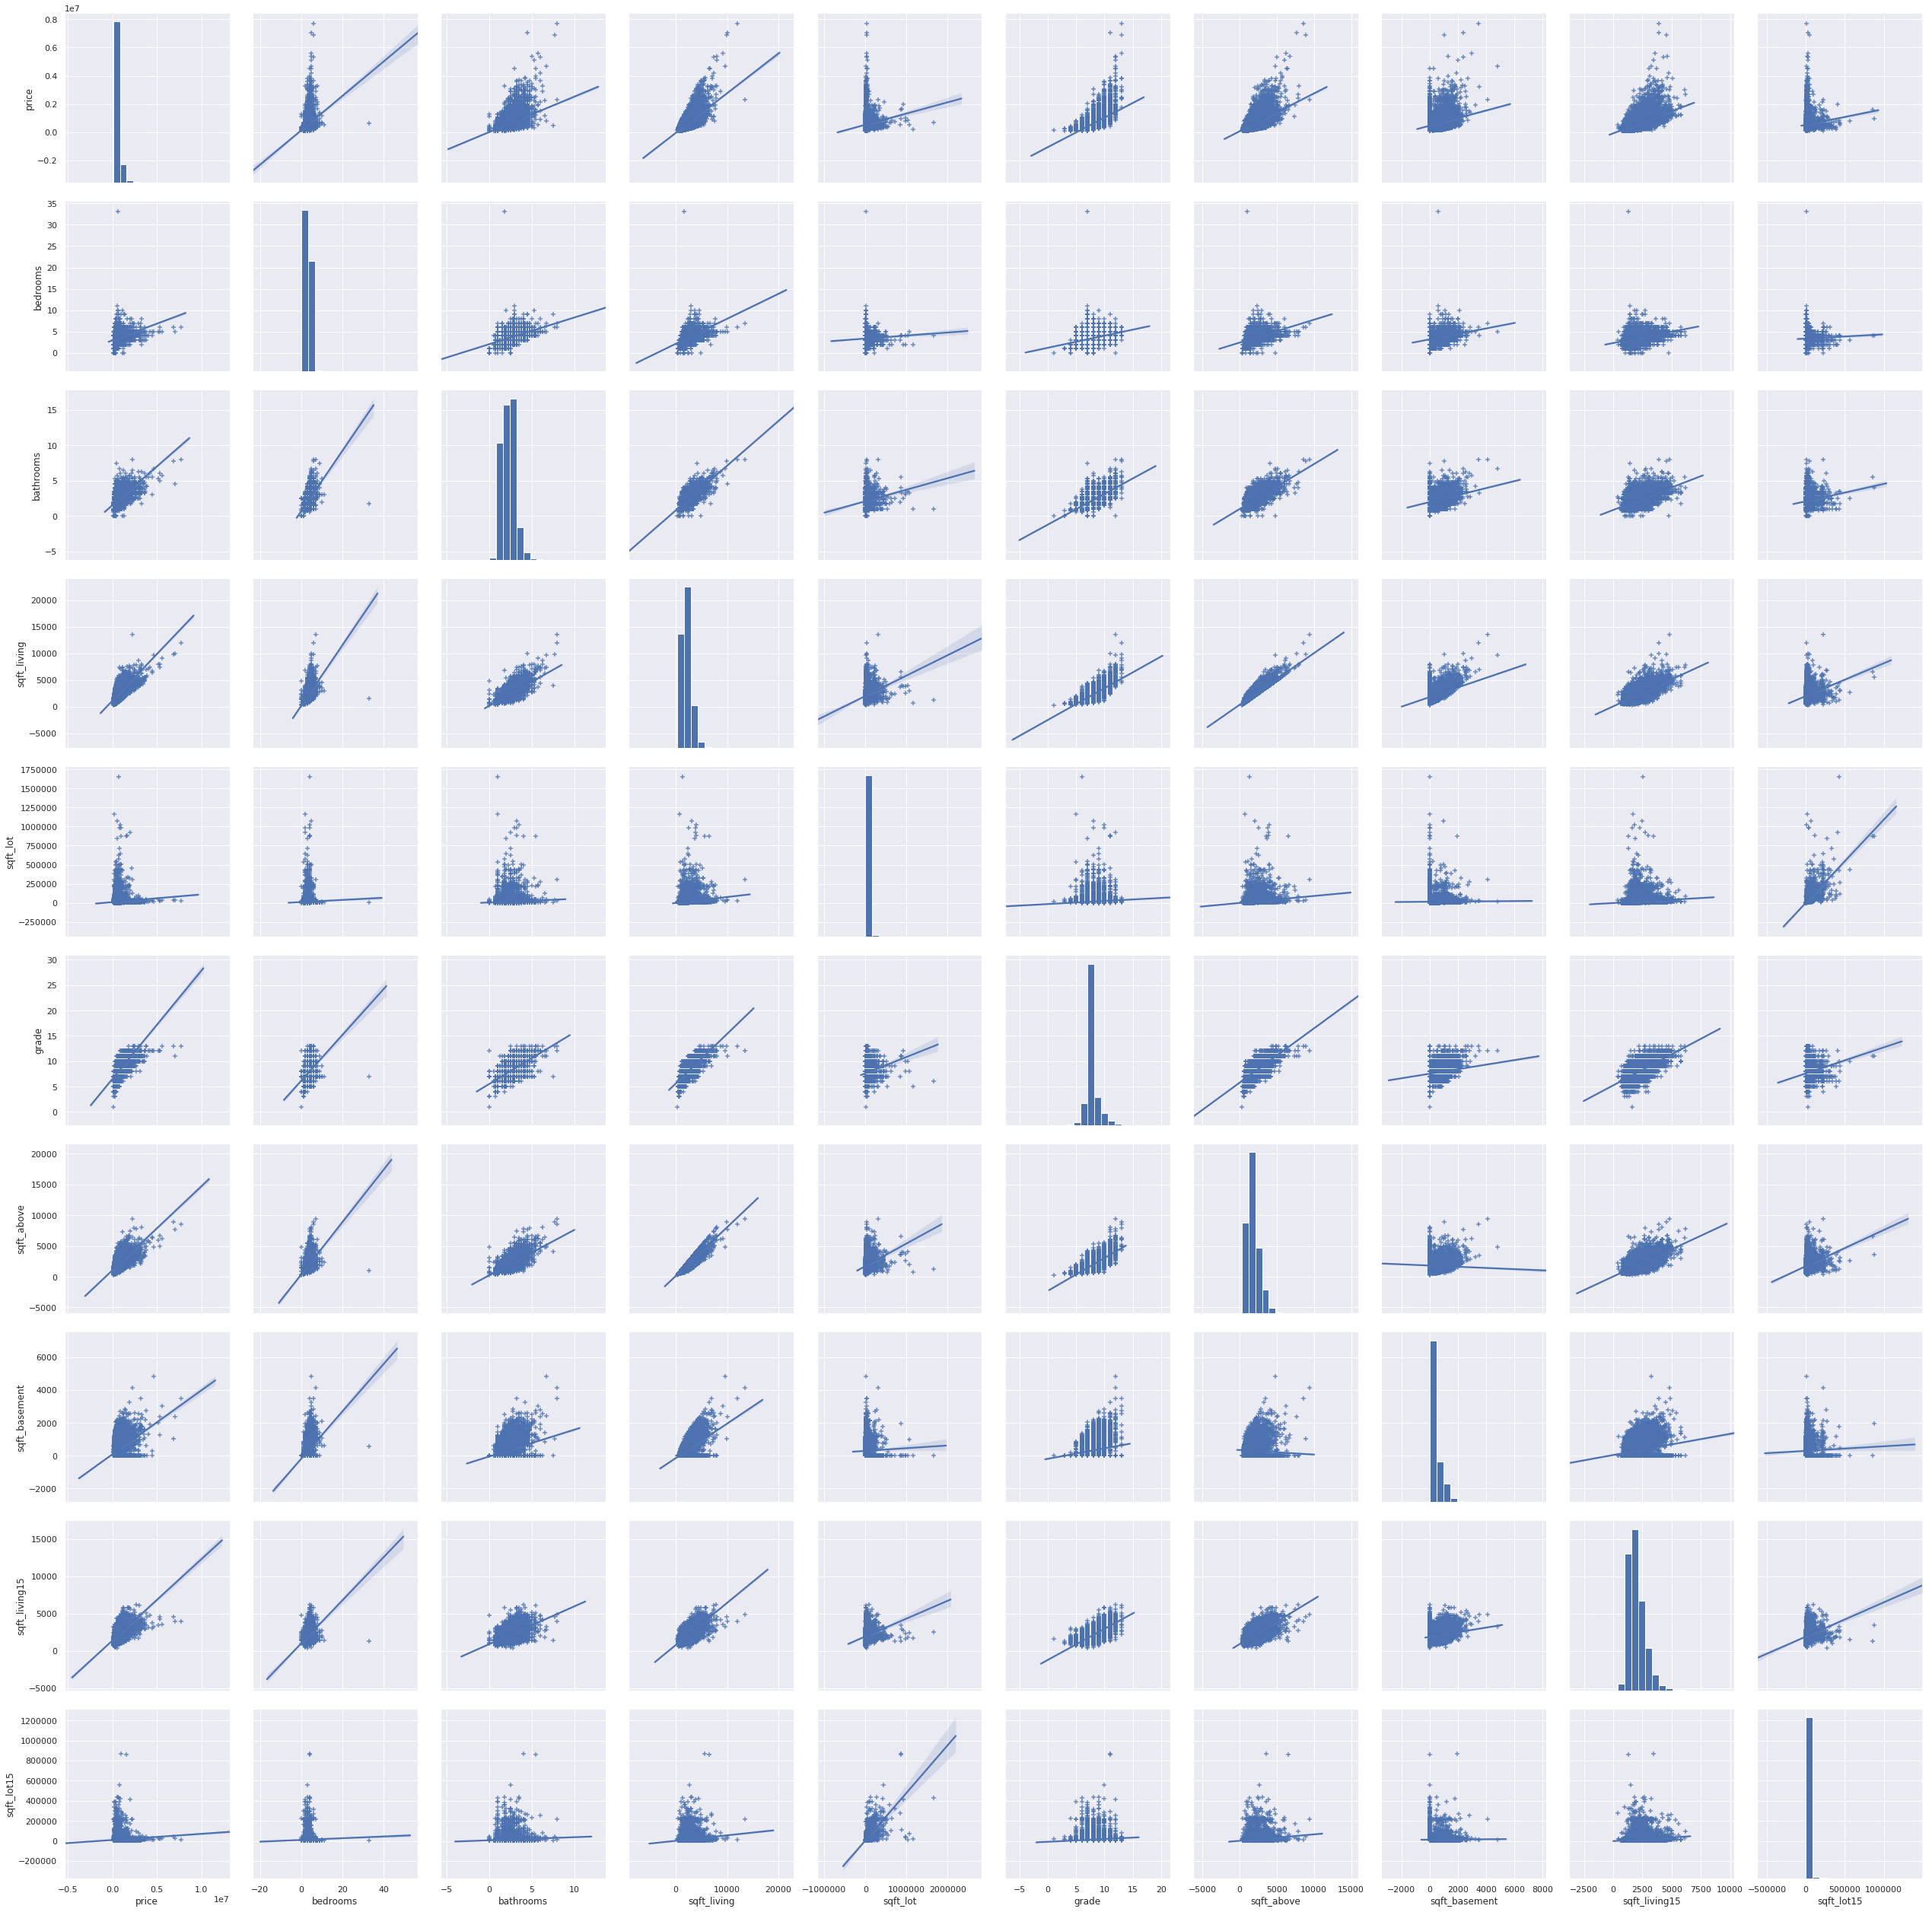

In [5]:
#On représente les "Pairplots" pour visualiser une forte corrélation
import seaborn as sns

sns.set()

cols =  ['price',
         'bedrooms',
         'bathrooms',
         'sqft_living',
         'sqft_lot',
         'grade',
         'sqft_above',
         'sqft_basement',
         'sqft_living15',
         'sqft_lot15']

sns_plot = sns.pairplot(df,vars=cols, kind="reg",markers="+", height = 3.5)
plt.show();

In [6]:
#sns_plot.savefig("/home/malick/Bureau/Stage_Projet_RTS/confluence-JDD/house/images/output.png")

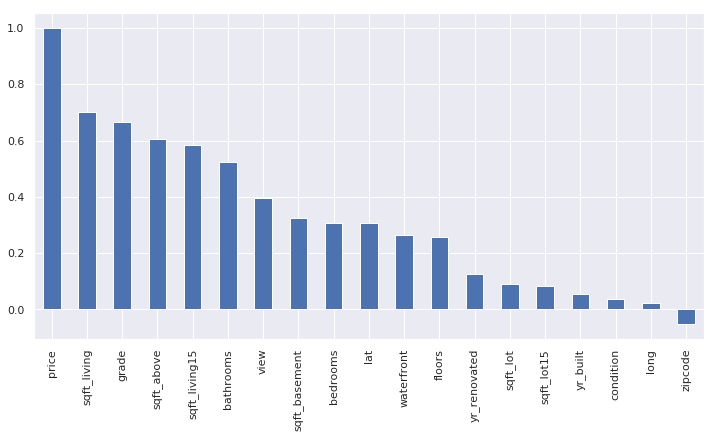

In [7]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(12,6))
df.corr()['price'].sort_values(ascending = False).plot(kind='bar')

In [8]:
#plt.savefig("/home/malick/Bureau/Stage_Projet_RTS/confluence-JDD/house/images/corr.png")

In [9]:
X = df.drop(["price"], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)

## RandomForestRegressor

In [10]:
# from sklearn.ensemble import RandomForestRegressor

# rand_regr = RandomForestRegressor(n_estimators=10,random_state=0)

# start = time()
# rand_regr.fit(X_train, y_train)
# end=time()

# train_time_rand=end-start

# random=rand_regr.score(X_test,y_test)
# predictions = rand_regr.predict(X_test)
# exp_rand = explained_variance_score(predictions,y_test)

# GradientBoostingRegressor

In [11]:
# from sklearn.ensemble import GradientBoostingRegressor

# start = time()
# est=GradientBoostingRegressor(n_estimators=10, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)
# end=time()
# train_time_g=end-start

# gradient=est.score(X_test,y_test)
# pred = est.predict(X_test)
# exp_est = explained_variance_score(pred,y_test)

# DecisionTreeRegressor

In [12]:
# from sklearn.tree  import DecisionTreeRegressor

# decision=DecisionTreeRegressor()

# start = time()
# decision.fit(X_train, y_train)
# end=time()
# train_time_dec=end-start

# decc=decision.score(X_test,y_test)
# decpredict = decision.predict(X_test)
# exp_dec = explained_variance_score(decpredict,y_test)

# AdaBoostRegressor

In [13]:
# from sklearn.ensemble import AdaBoostRegressor

# start = time()
# ada=AdaBoostRegressor(n_estimators=10, learning_rate=0.2,loss='exponential').fit(X_train, y_train)
# end=time()
# train_time_ada=end-start

# pred=ada.predict(X_test)
# adab=ada.score(X_test,y_test)
# predict = ada.predict(X_test)
# exp_ada = explained_variance_score(predict,y_test)

In [14]:
# # Comparing Models on the basis of Model's Accuracy Score and Explained Variance Score of different models
# models_cross = pd.DataFrame({
#     'Model': ['Gradient Boosting','AdaBoost','Random Forest','Decision Tree'],
#     'Score': [gradient,adab,random,decc],
#      'Variance Score': [exp_est,exp_ada,exp_rand,exp_dec]})
    
# models_cross.sort_values(by='Score', ascending=False)

ANALYZING TRAINING TIME EACH MODEL HAS TAKEN

In [15]:
# model = ['Adaboost', 'GBOOST', 'Random forest','Decision Tree']
# Train_Time = [
#     train_time_ada,
#     train_time_g,
#     train_time_rand,
#     train_time_dec
# ]

# index = np.arange(len(model))
# plt.bar(index, Train_Time)
# plt.xlabel('Machine Learning Models', fontsize=15)
# plt.ylabel('Training Time', fontsize=15)
# plt.xticks(index, model, fontsize=10, )
# plt.title('Comparison of Training Time of all ML models')
# #plt.savefig('/home/malick/Bureau/Stage_Projet_RTS/confluence/house/images/output2.png')
# plt.show()

## Conclusion

## XGBoostRegressor

In [16]:
# from xgboost import XGBRegressor, plot_importance # XGBoost

# start = time()

# xgb = XGBRegressor(n_estimators=10, learning_rate=0.08, gamma=0,
#                    subsample=0.75, colsample_bytree=1, max_depth=7)

# xgb.fit(X_train, y_train)

# end=time()
# train_time_xgb=end-start

# xgboost=xgb.score(X_test,y_test)
# pred_xgb = xgb.predict(X_test)
# exp_xgb = explained_variance_score(y_test,pred)

## Paramétres optimaux des modéles

In [17]:
from sklearn.model_selection import GridSearchCV

### 1. GradientBoostingRegressor

In [18]:
# start = time()

# parameters = {
#     "loss":["ls"],
#     "learning_rate": [0.01, 0.05, 0.1],
#     "min_samples_leaf": np.linspace(0.05, 0.01, 3),
#     "max_depth":[3, 5, 8],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse"],
#     "subsample":[0.5, 0.75, 1.0],
#     "n_estimators":[10, 20,50, 100, 200, 400],
#     }

# clf_GB = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5, n_jobs=-1,verbose=10)

# clf_GB.fit(X_train, y_train)

# end=time()
# train_time_g=end-start

# print("Train: ",clf_GB.score(X_train, y_train))
# print("Test: ",clf_GB.score(X_test, y_test))
# print("\n")
# print(clf_GB.best_params_)

### 2. RandomForestRegressor

In [19]:
# start = time()

# parameters = {
#     "max_depth":[3, 5, 8],
#     "max_features":["auto","sqrt"],
#     "criterion" : ["mse"],
#     "n_estimators":[10, 50, 100, 200, 400]
#     }

# clf_RF = GridSearchCV(RandomForestRegressor(), parameters, cv=5, n_jobs=-1,verbose=20)

# clf_RF.fit(X_train, y_train)

# end=time()
# train_time_rand=end-start

# print("Train: ",clf_RF.score(X_train, y_train))
# print("Test: ",clf_RF.score(X_test, y_test))
# print("\n")
# print(clf_RF.best_params_)

### 3. DecisionTreeRegressor 

In [20]:
# from sklearn.tree  import DecisionTreeRegressor

# start = time()

# parameters = {
#     "criterion": ["mse", "mae"],
#     "max_depth":[3, 5, 8],
#     "min_samples_split": [2, 0.001, 0.005],
#     "min_samples_leaf": [0.001, 0.005, 0.01, 0.01],
#     "max_features": [1., "sqrt"]
#     }

# clf_DT = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5, n_jobs=-1,verbose=10)

# clf_DT.fit(X_train, y_train)

# end=time()
# train_time_dec=end-start

# print("Train: ",clf_DT.score(X_train, y_train))
# print("Test: ",clf_DT.score(X_test, y_test))
# print("\n")
# print(clf_DT.best_params_)

### 4.XGBoostRegressor

In [21]:
# start = time()

# parameters = {
#     "learning_rate": [0.01, 0.05, 0.1],
#     "max_depth":[3, 5, 8],
#     "subsample":[0.5, 1.0],
#     "colsample_bytree": [0.5, 1.0],
#     "n_estimators":[10, 100, 200, 400],
#     }

# clf_XGB = GridSearchCV(XGBRegressor(), parameters, cv=5, n_jobs=-1,verbose=10)

# clf_XGB.fit(X_train, y_train)

# end=time()
# train_time_xgb=end-start

# print("Train: ",clf_XGB.score(X_train, y_train))
# print("Test: ",clf_XGB.score(X_test, y_test))
# print("\n")
# print(clf_XGB.best_params_)

### Conclusion

In [22]:
# model = ['XGBoost','GBoost', 'Random forest','Decision Tree']
# Train_Time = [
#     train_time_xgb/60,
#     train_time_g/60,
#     train_time_rand/60,
#     train_time_dec/60
# ]

# index = np.arange(len(model))
# plt.bar(index, Train_Time)
# plt.xlabel('Machine Learning Models', fontsize=15)
# plt.ylabel('Training Time(minutes)', fontsize=15)
# plt.xticks(index, model, fontsize=10, )
# plt.title('Comparison of Training Time of all ML models  with GridSearchCV')
# plt.show()

In [23]:
#save modele
#from sklearn.externals import joblib

#file = "/home/malick/Bureau/Stage_Projet_RTS/confluence-JDD/house/models"

#joblib.dump(clf_DT.best_estimator_, file + "/clf_DT", compress = 1)
#joblib.dump(clf_RF.best_estimator_, file + "/clf_RF", compress = 1)
#joblib.dump(clf_GB.best_estimator_, file + "/clf_GB", compress = 1)
#joblib.dump(clf_XGB.best_estimator_, file + "/clf_XGB", compress = 1)

In [24]:
#load models
from sklearn.externals import joblib

file = "/home/malick/Bureau/Stage_Projet_RTS/confluence-JDD/house/models"

clf_DT = joblib.load(file + "/clf_DT") 
clf_GB = joblib.load(file + "/clf_GB")
clf_XGB = joblib.load(file + "/clf_XGB") 
clf_RF = joblib.load(file + "/clf_RF") 

/home/malick/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


[09:49:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
# Comparing Models on the basis of Model's Accuracy Score and Explained Variance Score of different models

from sklearn.metrics import explained_variance_score, \
                            max_error, \
                            mean_absolute_error, \
                            mean_squared_error, \
                            median_absolute_error, \
                            r2_score

dt = clf_DT.score(X_test, y_test)
grad = clf_GB.score(X_test, y_test)
xgrad = clf_XGB.score(X_test, y_test)
rf = clf_RF.score(X_test, y_test)

exp_dt = explained_variance_score(clf_DT.predict(X_test),y_test)
exp_grad = explained_variance_score(clf_GB.predict(X_test),y_test)
exp_xgrad = explained_variance_score(clf_XGB.predict(X_test),y_test)
exp_rf = explained_variance_score(clf_RF.predict(X_test),y_test)

max_dt = max_error(clf_DT.predict(X_test),y_test)
max_grad = max_error(clf_GB.predict(X_test),y_test)
max_xgrad = max_error(clf_XGB.predict(X_test),y_test)
max_rf = max_error(clf_RF.predict(X_test),y_test)

MAE_dt = mean_absolute_error(clf_DT.predict(X_test),y_test)
MAE_grad = mean_absolute_error(clf_GB.predict(X_test),y_test)
MAE_xgrad = mean_absolute_error(clf_XGB.predict(X_test),y_test)
MAE_rf = mean_absolute_error(clf_RF.predict(X_test),y_test)

RMSE_dt = mean_squared_error(clf_DT.predict(X_test),y_test)**0.5
RMSE_grad = mean_squared_error(clf_GB.predict(X_test),y_test)**0.5
RMSE_xgrad = mean_squared_error(clf_XGB.predict(X_test),y_test)**0.5
RMSE_rf = mean_squared_error(clf_RF.predict(X_test),y_test)**0.5

MedAE_dt = median_absolute_error(y_test, clf_DT.predict(X_test))
MedAE_grad = median_absolute_error(y_test, clf_GB.predict(X_test))
MedAE_xgrad = median_absolute_error(y_test, clf_XGB.predict(X_test))
MedAE_rf = median_absolute_error(y_test, clf_RF.predict(X_test))

def Adj(R2,n,p):
    """
        fonction qui calcul le R2 ajusté
        n: nombre de lignes
        p: nombre de colonnes
    """
    return 1-(1-R2)*(n-1)/(n-p-1)

r2_score_adj_dt = Adj(r2_score(y_test, clf_DT.predict(X_test)),X_test.shape[0],X_test.shape[1])
r2_score_adj_grad = Adj(r2_score(y_test, clf_GB.predict(X_test)),X_test.shape[0],X_test.shape[1])
r2_score_adj_xgrad = Adj(r2_score(y_test, clf_XGB.predict(X_test)),X_test.shape[0],X_test.shape[1])
r2_score_adj_rf = Adj(r2_score(y_test, clf_RF.predict(X_test)),X_test.shape[0],X_test.shape[1])

models_cross = pd.DataFrame({
    'Model': ['Gradient Boosting','XGBoost','Random Forest','Decision Tree'],
    'Score': [grad,xgrad,rf,dt],
    'Variance_Score': [exp_grad,exp_xgrad,exp_rf,exp_dt],
    'R2_score_adj' : [r2_score_adj_grad,r2_score_adj_xgrad,r2_score_adj_rf,r2_score_adj_dt],
    'MAE': [MAE_grad,MAE_xgrad,MAE_rf,MAE_dt],
    'RMSE' : [RMSE_grad, RMSE_xgrad, RMSE_rf, RMSE_dt],
    'MedAE' : [MedAE_grad, MedAE_xgrad, MedAE_rf, MedAE_dt],
    'Max_Error': [max_grad,max_xgrad,max_rf,max_dt]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score,Variance_Score,R2_score_adj,MAE,RMSE,MedAE,Max_Error
1,XGBoost,0.936297,0.930093,0.936120,55840.973032,90535.355531,37139.796875,2.159808e+06
0,Gradient Boosting,0.896248,0.882371,0.895959,66273.787910,115541.469824,40096.625994,2.012999e+06
2,Random Forest,0.882920,0.850344,0.882594,77119.129237,122738.393784,49435.277279,1.186237e+06
3,Decision Tree,0.810369,0.769082,0.809841,90770.798811,156204.701827,54894.308944,2.059668e+06
